# Лабораторная работа №4

ФИО:  Пуцеловский Евгений Андреевич   
Группа: БИВТ-20-1 

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# 1 - 3. Загрузка и оформление датасета в виде объекта класса Dataset из PyTorch, визуализация данных  

In [43]:
import numpy as np
import pandas as pd
import torchvision
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import time
import os
import copy

In [31]:
# in Colab
!pip install datasets  
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
to_transform = {
    'train':
    transforms.Compose([
        transforms.RandomHorizontalFlip(0.5), 
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
    ]),
    'test':
    transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
    ]),
}

In [33]:
train_dataset_unsplitted = torchvision.datasets.CIFAR100(root='data', train=True, download=True, transform=to_transform['train'])
test_dataset = torchvision.datasets.CIFAR100(root='data', download=True, transform=to_transform['test'])

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_unsplitted, [40000, 10000])
dataset = {
    'train': train_dataset, 
    'val': val_dataset,
    'test': test_dataset
}

Files already downloaded and verified
Files already downloaded and verified


### Датасет CIFAR-100 - это коллекция изображений, которые обычно используются для обучения алгоритмов машинного обучения и компьютерного зрения. Данный набор состоит из 60000 больших цветных изображений 32 на 32 в 100 классах, что означает 600 изображений в каждом классе. 
### 1. водные млекопитающие:	бобр, дельфин, выдра, тюлень, кит
### 2.	цветы:	орхидеи, маки, розы, подсолнухи, тюльпаны
### 3.	рыбы:	аквариумные рыбки, камбала, скат, акула, форель
### 4.	пищевые контейнеры:	бутылки, миски, банки, чашки, тарелки
### 5.	бытовые электроприборы:	часы, компьютерная клавиатура, лампа, телефон, телевизор
### 6.	фрукты и овощи:	яблоки, грибы, апельсины, груши, сладкий перец
### 7.	мебель для дома:	кровать, стул, диван, стол, шкаф
### 8.	крупные хищники:	медведь, леопард, лев, тигр, волк
### 9.	насекомые:	пчела, жук, бабочка, гусеница, таракан
### 10.	большие уличные сооружения:	мост, замок, дом, дорога, небоскреб
### 11.	большие природные объекты:	облако, лес, горы, равнина, море
### 12.	млекопитающие среднего размера:	лиса, дикобраз, опоссум, енот, скунс
### 13.	крупные всеядные и травоядные:	верблюд, крупный рогатый скот, шимпанзе, слон, кенгуру
### 14.	беспозвоночные, не являющиеся насекомыми:	краб, омар, улитка, паук, червь
### 15.	рептилии:	крокодил, динозавр, ящерица, змея, черепаха
### 16.	люди:	ребенок, мальчик, девочка, мужчина, женщина
### 17.	деревья:	клен, дуб, пальма, сосна, ива
### 18.	мелкие млекопитающие:	хомяк, мышь, кролик, землеройка, белка
### 19.	транспортные средства 1:	велосипед, автобус, мотоцикл, пикап, поезд
### 20.	транспортные средства 2:	газонокосилка, ракета, трамвай, танк, трактор
### Тем самым, ставится задача классификации изображений, то есть отнесения того или иного изображения к одному из вышепредставленных классов.



In [34]:
len(train_dataset_unsplitted.classes)

100

In [35]:
train_dataset_unsplitted.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

#### Примеры изображений

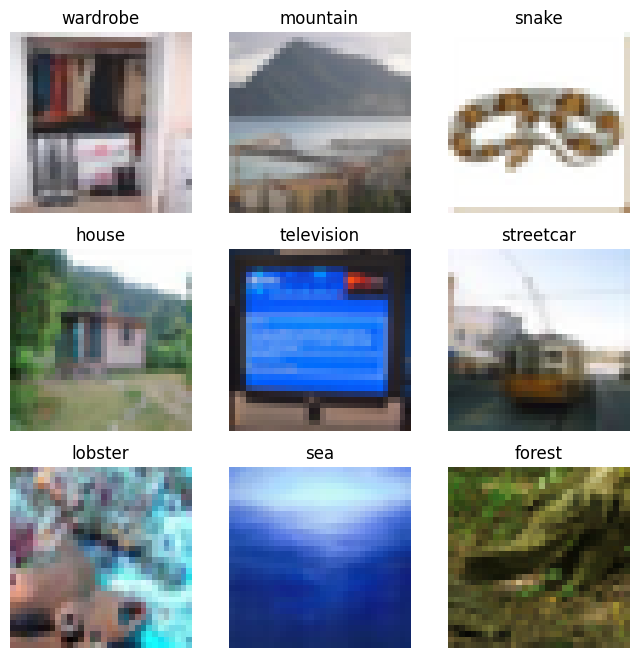

In [36]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset_unsplitted), size=(1,)).item()
    img, label = train_dataset_unsplitted.data[sample_idx], train_dataset_unsplitted.targets[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(train_dataset_unsplitted.classes[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 4. Оформить датасет объекта класса Dataset в Dataloader.

In [37]:
train_dataloader = DataLoader(dataset['train'], batch_size=64, shuffle=True, num_workers=0)
val_dataloader = DataLoader(dataset['val'], batch_size=64, shuffle=True, num_workers=0)
test_dataloader = DataLoader(dataset['test'], batch_size=64, shuffle=True, num_workers=0)

In [38]:
dataloaders = {'train': train_dataloader, 'val': val_dataloader,'test': test_dataloader}

In [39]:
train_dataloader

# 5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).

In [40]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [41]:
def train_model(model, dataloader, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataset[phase])
            epoch_acc = running_corrects.double() / len(dataset[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [42]:
model = nn.Sequential(
    nn.Conv2d(3, 16, 2),
    nn.ELU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 32, 2),
    nn.ELU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 128, 2),

    nn.Flatten(),

    nn.Linear(4608, 512), 
    nn.ELU(),
    nn.Linear(512, 100)
)

model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model.parameters(), lr=0.0022, momentum=0.9, weight_decay=0.000001)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_sgd, step_size=5, gamma=0.1)

In [ ]:
model = train_model(model, dataloaders ,criterion, optimizer, exp_lr_scheduler, num_epochs=10)

Epoch 1/10
----------


KeyboardInterrupt: ignored